<a href="https://colab.research.google.com/github/shubham5027/Bank_Customer_Chrun_Prediction/blob/main/bank_churn_customer_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Customer Churn Prediction Using Machine Learning

#Objective :
 In this process of using machine learning models to identify customers who are likely to leave in the near future. ML algorithms analyze existing customer data, such as credit score and estimated salary, to identify patterns of customer behavior and make predictions about upcoming churn rates

#Data Source:

https://github.com/YBIFoundation/Dataset/blob/main/Bank%20Churn%20Modelling.csv

##Import Librery

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Import Data

In [110]:
df = pd.read_csv('/content/Churn_Modelling.csv')


#Describe Dataset

In [109]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [30]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [31]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Dropping Irrelevant Features

In [32]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [33]:
df = df.drop(['RowNumber','CustomerId', 'Surname'],axis=1)

In [34]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [35]:
df = pd.get_dummies(df,drop_first = True)

In [36]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


# Data Visualization

In [37]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: ylabel='count'>

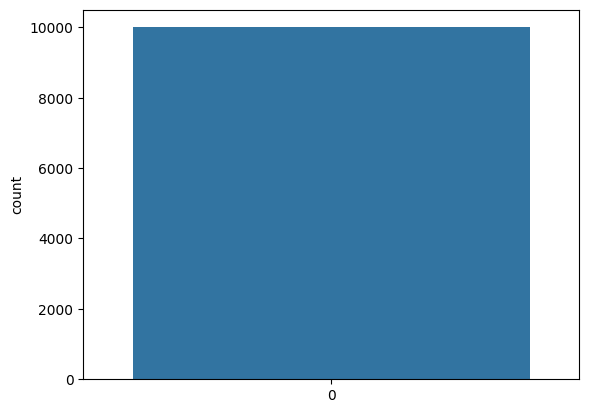

In [38]:
sns.countplot(df['Exited'])

<Axes: ylabel='count'>

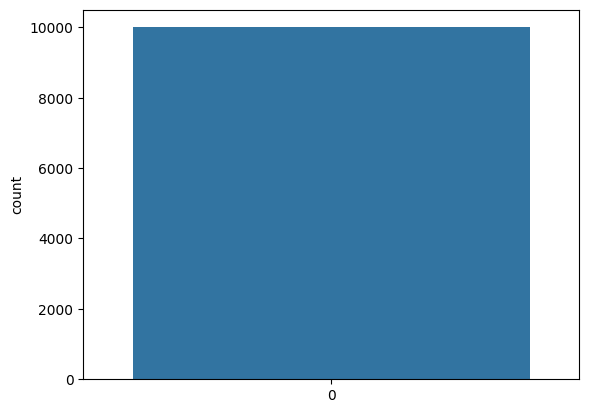

In [111]:
sns.countplot(df['Balance'])

<Axes: xlabel='Age', ylabel='Balance'>

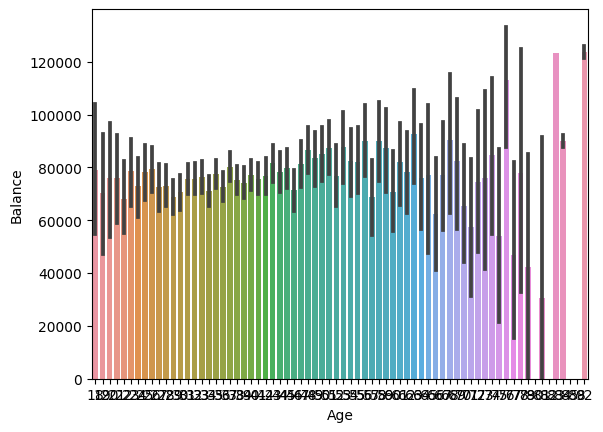

In [112]:
sns.barplot(df,x='Age',y='Balance')

<Axes: xlabel='Balance', ylabel='Tenure'>

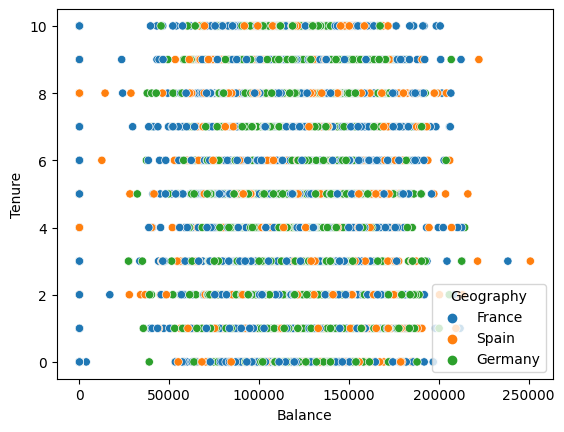

In [113]:
sns.scatterplot(df,x='Balance',y='Tenure',hue='Geography')

#Define Target and Feature Variable

In [39]:
X = df.drop('Exited',axis=1)
y = df['Exited']

## Data Preprocessing

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [42]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

<Axes: ylabel='count'>

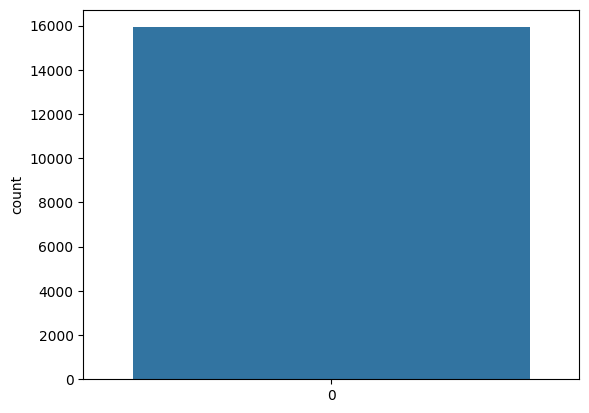

In [43]:
sns.countplot(y_res)

## Splitting The Dataset into Training Set and Test Set

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=47)

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
sc = StandardScaler()

In [48]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
X_train

array([[ 0.76327016, -0.9008852 ,  0.79913027, ..., -0.57237838,
         2.17252303, -0.84017341],
       [-0.67789532, -0.80155018,  1.16619678, ..., -0.57237838,
        -0.46029431,  1.19023048],
       [-1.32205261,  0.19179999,  0.79913027, ..., -0.57237838,
         2.17252303,  1.19023048],
       ...,
       [-0.52504443,  0.291135  , -1.4032688 , ..., -0.57237838,
        -0.46029431, -0.84017341],
       [ 0.47940423, -1.00022022, -1.4032688 , ..., -0.57237838,
        -0.46029431,  1.19023048],
       [ 1.63670378,  2.17850032, -1.4032688 , ..., -0.57237838,
        -0.46029431, -0.84017341]])

#Modelling with Different Algorithms

 Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
log = LogisticRegression()

In [52]:
log.fit(X_train, y_train)

LogisticRegression()

In [53]:
y_pred1 = log.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(y_test,y_pred1)

0.7743825868564252

In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [57]:
precision_score(y_test, y_pred1)

0.7613117476131175

In [58]:
recall_score(y_test, y_pred1)

0.7847667950363714

In [59]:
f1_score(y_test,y_pred1)

0.7728613569321533

SVC

In [60]:
from sklearn import svm

In [61]:
svm = svm.SVC()

In [62]:
svm.fit(X_train,y_train)

SVC()

In [63]:
y_pred2=svm.predict(X_test)

In [64]:
accuracy_score(y_test, y_pred2)

0.8281707827542905

In [65]:
precision_score(y_test, y_pred2)

0.8250428816466552

In [66]:
recall_score(y_test, y_pred2)

0.8232777064612752

In [67]:
f1_score(y_test,y_pred2)

0.8241593488969801

 KNeighbors Classifier

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
knn = KNeighborsClassifier()

In [70]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [71]:
y_pred3=knn.predict(X_test)

In [72]:
accuracy_score(y_test, y_pred3)

0.8095437421515278

In [73]:
precision_score(y_test, y_pred3)

0.7892176732873936

In [74]:
recall_score(y_test, y_pred3)

0.8331193838254172

In [75]:
f1_score(y_test,y_pred3)

0.8105745212323063

 Desicion Tree Classifier

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
dt = DecisionTreeClassifier()

In [78]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [79]:
y_pred4=dt.predict(X_test)

In [80]:
accuracy_score(y_test, y_pred4)

0.7827542904981164

In [81]:
precision_score(y_test, y_pred4)

0.7671740024681201

In [82]:
recall_score(y_test, y_pred4)

0.7980316645271716

In [83]:
f1_score(y_test,y_pred4)

0.7822986577181208

Random Forest Classifier

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf = RandomForestClassifier()

In [86]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [87]:
y_pred5=rf.predict(X_test)

In [88]:
accuracy_score(y_test,y_pred5)

0.8438677270824613

In [89]:
precision_score(y_test, y_pred5)

0.8372191606612972

In [90]:
recall_score(y_test, y_pred5)

0.8451005562687206

In [91]:
f1_score(y_test,y_pred5)

0.8411413969335605

 Gradient Boosting Classifier

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

In [93]:
gbc = GradientBoostingClassifier()

In [94]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [95]:
y_pred6=gbc.predict(X_test)

In [96]:
accuracy_score(y_test,y_pred6)

0.8304730012557555

In [97]:
precision_score(y_test,y_pred6)

0.8300907911802854

In [98]:
recall_score(y_test,y_pred6)

0.8215661103979461

In [99]:
f1_score(y_test,y_pred6)

0.8258064516129032

XGBoost

In [100]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, verbosity = 0)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [101]:
y_pred7=model_xgb.predict(X_test)

In [102]:
accuracy_score(y_test,y_pred7)

0.8551695269987443

In [103]:
precision_score(y_test,y_pred7)

0.8454430911381773

In [104]:
recall_score(y_test,y_pred6)

0.8215661103979461

In [105]:
f1_score(y_test,y_pred6)

0.8258064516129032

#Model Evauation

In [106]:
performance_summary = pd.DataFrame({
    'Model':['LR','SVC','KNN','DT','RF','GBC','XGB'],
    'ACC':[accuracy_score(y_test,y_pred1),
           accuracy_score(y_test,y_pred2),
           accuracy_score(y_test,y_pred3),
           accuracy_score(y_test,y_pred4),
           accuracy_score(y_test,y_pred5),
           accuracy_score(y_test,y_pred6),
           accuracy_score(y_test,y_pred7)
          ]
})

In [107]:
performance_summary

,Model,ACC
0,LR,0.774383
1,SVC,0.828171
2,KNN,0.809544
3,DT,0.782754
4,RF,0.843868
5,GBC,0.830473
6,XGB,0.855170


As we can see, XGBoost Classifier has highest accuracy

#Prediction

In [122]:
prediction=model_xgb.predict(X_test)

In [123]:
prediction

array([0, 0, 1, ..., 0, 1, 0])

#Explaination:
Using algorithms such as Logistic Regression, Decision Trees, XGBoost, Support Vector Machines (SVM), and Random Forest for this project provides a comprehensive analysis of different modeling techniques.

Furthermore, it's to perform feature importance analysis for each algorithm to gain insights into which features are most influential in predicting customer churn. This can provide valuable business insights and help in understanding the factors driving customer attrition.

Overall, using multiple algorithms for bank customer churn prediction perfomr good, where XGboost gives maximum accuracy nearly 85%.